In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

#Import the api key
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | corpus christi
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | mujiayingzi
Processing Record 4 of Set 1 | parker
Processing Record 5 of Set 1 | tautira
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | zyryanka
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | the pas
Processing Record 13 of Set 1 | constitucion
Processing Record 14 of Set 1 | hervey bay
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | antofagasta
Processing Record 17 of Set 1 | saint-joseph
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | tucuman
Processing Record 20 of Set 1 | harper
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | ra

Processing Record 40 of Set 4 | popondetta
Processing Record 41 of Set 4 | coquimbo
Processing Record 42 of Set 4 | mandalgovi
Processing Record 43 of Set 4 | varhaug
Processing Record 44 of Set 4 | padang
Processing Record 45 of Set 4 | batemans bay
Processing Record 46 of Set 4 | raglan
Processing Record 47 of Set 4 | longyearbyen
Processing Record 48 of Set 4 | aden
Processing Record 49 of Set 4 | kudahuvadhoo
Processing Record 50 of Set 4 | teya
Processing Record 1 of Set 5 | nhulunbuy
Processing Record 2 of Set 5 | toliary
City not found. Skipping...
Processing Record 3 of Set 5 | pevek
Processing Record 4 of Set 5 | salalah
Processing Record 5 of Set 5 | quelimane
Processing Record 6 of Set 5 | laguna
Processing Record 7 of Set 5 | idlib
Processing Record 8 of Set 5 | fortuna
Processing Record 9 of Set 5 | severo-kurilsk
Processing Record 10 of Set 5 | bluff
Processing Record 11 of Set 5 | mar del plata
Processing Record 12 of Set 5 | yellowknife
Processing Record 13 of Set 5 | a

Processing Record 26 of Set 8 | voh
Processing Record 27 of Set 8 | bon accord
Processing Record 28 of Set 8 | visakhapatnam
Processing Record 29 of Set 8 | beloha
Processing Record 30 of Set 8 | oruro
Processing Record 31 of Set 8 | bilma
Processing Record 32 of Set 8 | coihaique
Processing Record 33 of Set 8 | ambulu
Processing Record 34 of Set 8 | sabzevar
Processing Record 35 of Set 8 | berlevag
Processing Record 36 of Set 8 | sitka
Processing Record 37 of Set 8 | bastrop
Processing Record 38 of Set 8 | omutinskoye
City not found. Skipping...
Processing Record 39 of Set 8 | rio grande
Processing Record 40 of Set 8 | nome
Processing Record 41 of Set 8 | churapcha
Processing Record 42 of Set 8 | storsteinnes
Processing Record 43 of Set 8 | vilyuysk
Processing Record 44 of Set 8 | lhokseumawe
Processing Record 45 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 46 of Set 8 | acari
Processing Record 47 of Set 8 | tezu
Processing Record 48 of Set 8 | portoferraio
Pr

Processing Record 9 of Set 12 | sumbe
Processing Record 10 of Set 12 | codrington
Processing Record 11 of Set 12 | troitsko-pechorsk
Processing Record 12 of Set 12 | awjilah
Processing Record 13 of Set 12 | killam
Processing Record 14 of Set 12 | bezhetsk
Processing Record 15 of Set 12 | puerto escondido
Processing Record 16 of Set 12 | cabanas
Processing Record 17 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 18 of Set 12 | muisne
Processing Record 19 of Set 12 | staraya russa
Processing Record 20 of Set 12 | wawa
Processing Record 21 of Set 12 | dalvik
Processing Record 22 of Set 12 | kibara
Processing Record 23 of Set 12 | rafaela
Processing Record 24 of Set 12 | green river
Processing Record 25 of Set 12 | anadyr
Processing Record 26 of Set 12 | majene
Processing Record 27 of Set 12 | batagay-alyta
Processing Record 28 of Set 12 | kampene
Processing Record 29 of Set 12 | tiarei
Processing Record 30 of Set 12 | pinos puente
Processing Record 31 of Set 12 | kashi

In [14]:
len(city_data)

547

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Corpus Christi,27.8006,-97.3964,69.01,49,20,4.61,US,2021-03-20 20:26:16
1,Punta Arenas,-53.1500,-70.9167,51.80,58,75,34.52,CL,2021-03-20 20:21:21
2,Mujiayingzi,42.1167,118.7833,25.72,42,64,19.35,CN,2021-03-20 20:26:17
3,Parker,32.7668,-97.8003,69.01,43,0,4.00,US,2021-03-20 20:26:17
4,Tautira,-17.7333,-149.1500,87.80,66,75,13.80,PF,2021-03-20 20:26:17
5,Jamestown,42.0970,-79.2353,51.80,20,1,2.68,US,2021-03-20 20:23:12
6,East London,-33.0153,27.9116,71.44,86,75,14.03,ZA,2021-03-20 20:26:18
7,Provideniya,64.3833,-173.3000,2.86,78,100,15.14,RU,2021-03-20 20:26:18
8,Zyryanka,65.7500,150.8500,-13.16,82,0,7.27,RU,2021-03-20 20:26:19
9,Rikitea,-23.1203,-134.9692,79.66,75,10,8.03,PF,2021-03-20 20:26:19


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Corpus Christi,US,2021-03-20 20:26:16,27.8006,-97.3964,69.01,49,20,4.61
1,Punta Arenas,CL,2021-03-20 20:21:21,-53.1500,-70.9167,51.80,58,75,34.52
2,Mujiayingzi,CN,2021-03-20 20:26:17,42.1167,118.7833,25.72,42,64,19.35
3,Parker,US,2021-03-20 20:26:17,32.7668,-97.8003,69.01,43,0,4.00
4,Tautira,PF,2021-03-20 20:26:17,-17.7333,-149.1500,87.80,66,75,13.80
5,Jamestown,US,2021-03-20 20:23:12,42.0970,-79.2353,51.80,20,1,2.68
6,East London,ZA,2021-03-20 20:26:18,-33.0153,27.9116,71.44,86,75,14.03
7,Provideniya,RU,2021-03-20 20:26:18,64.3833,-173.3000,2.86,78,100,15.14
8,Zyryanka,RU,2021-03-20 20:26:19,65.7500,150.8500,-13.16,82,0,7.27
9,Rikitea,PF,2021-03-20 20:26:19,-23.1203,-134.9692,79.66,75,10,8.03


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

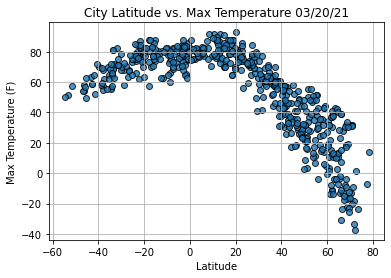

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

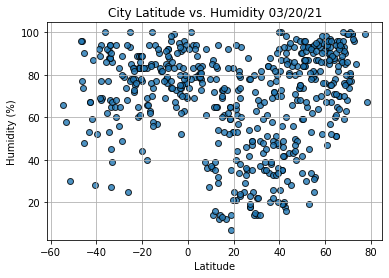

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

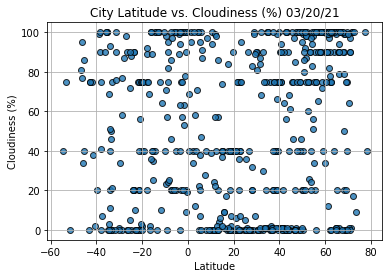

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

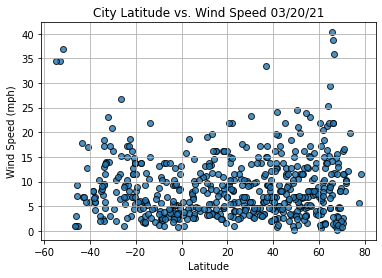

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Corpus Christi,US,2021-03-20 20:26:16,27.8006,-97.3964,69.01,49,20,4.61
2,Mujiayingzi,CN,2021-03-20 20:26:17,42.1167,118.7833,25.72,42,64,19.35
3,Parker,US,2021-03-20 20:26:17,32.7668,-97.8003,69.01,43,0,4.00
5,Jamestown,US,2021-03-20 20:23:12,42.0970,-79.2353,51.80,20,1,2.68
7,Provideniya,RU,2021-03-20 20:26:18,64.3833,-173.3000,2.86,78,100,15.14


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

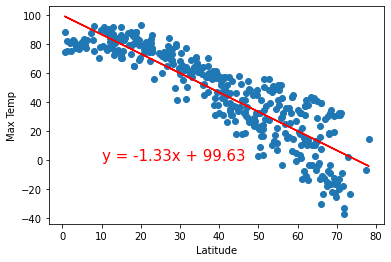

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))


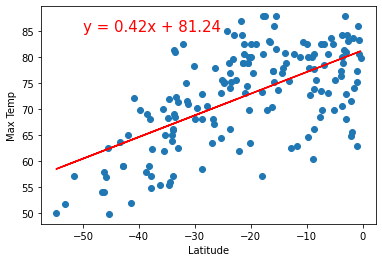

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

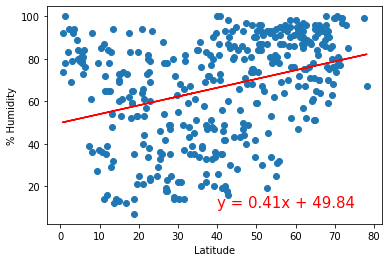

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


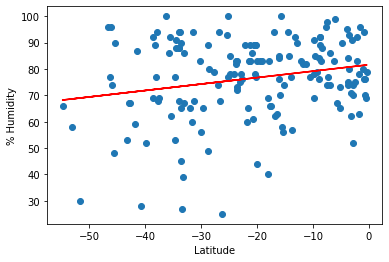

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

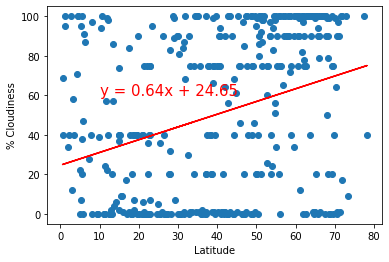

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))


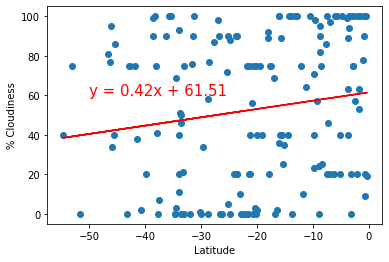

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


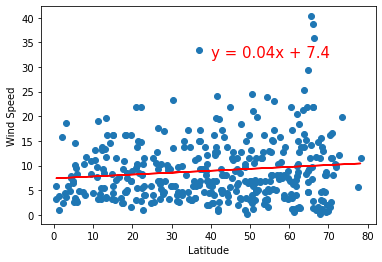

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,32))

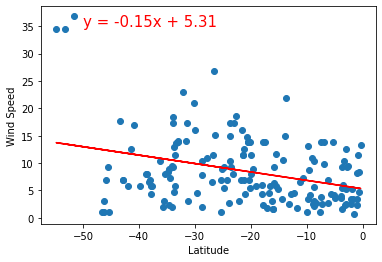

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))